# Numerical Methods

# 2021/22 Class Assessment

The following gives sketches of solutions - code is reused from lectures in many places.

## Thursday 12th May 2022

## 11:00 - 14:00 (UK time: BST= GMT+1)

## Test instructions


* This test contains **FIVE** questions with multiple parts, **all** of which should be answered.



* Write your solution in *markdown* (text and equations) and *code* (Python) cells under each question.



* [You may if you choose also submit parts of your answers via **scans of hand written pages** - feel free to use this option in particular for supplementary sketches or equations, you will not be marked down for not embedding equations into your markdown cells. But please make sure that the question number each sheet you scan refers to is very clear. Please use the Microsoft Office Lens solution you're using for exams.]



* You should provide an explanation of your solution as comments in your code and in the surrounding markdown cells as appropriate to answer the question and explain your steps.



* Unless explicitly told otherwise in the question you can reuse any code from the lectures and homeworks, you can also use any calls to standard libraries (e.g. NumPy, SciPy).



* **Save your work regularly**


* At the end of the test you should if necessary **Download your Jupyter notebook** (i.e. the file with a .ipynb extension), and **email your Jupyter notebook document**  and any **scans of hand written sheets** to [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott) at <mailto:m.d.piggott@imperial.ac.uk>.



* If there are any issues during the assessment period **please document these**, e.g. via photos, and as soon as possible email <mailto:m.d.piggott@imperial.ac.uk> to report the problem.



* If your email attachments together are larger than 10Mb please use <https://fileexchange.ic.ac.uk/>

This time-limited remote assessment is being run as an open-book examination. We have worked hard to create exams that assesses synthesis of knowledge rather than factual recall. Thus, access to the internet, notes or other sources of factual information in the time provided will not be helpful and may well limit your time to successfully synthesise the answers required. Where individual questions rely more on factual recall and may therefore be less discriminatory in an open book context, we may compare the performance on these questions to similar style questions in previous years and we may scale or ignore the marks associated with such questions or parts of the questions. The use of the work of another student, past or present, constitutes plagiarism. Giving your work to another student to use may also constitute an offence. Collusion is a form of plagiarism and will be treated in a similar manner. This is an individual assessment and thus should be completed solely by you. The College will investigate all instances where an examination or assessment offence is reported or suspected, using plagiarism software, vivas and other tools, and apply appropriate penalties to students. In all examinations we will analyse exam performance against previous performance and against data from previous years and use an evidence-based approach to maintain a fair and robust examination. As with all exams, the best strategy is to read the question carefully and answer as fully as possible, taking account of the time and number of marks available.

In [122]:
# you may import any libraries we used in lectures, e.g.

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy.interpolate as si
import scipy.integrate as integrate
import scipy.linalg as sl
import scipy.optimize as sop

### Question 1 - interpolation, extrapolation and curve-fitting [20 marks]

<br>

Consider a data set made up of multiple $(x,y)$ values.

<br>

**1.1 [6 marks]**

Explain what the tasks of interpolation, extrapolation and curve-fitting are. 

<br>

**1.2 [7 marks]**

Make up your own sample data set made up of five distinct $(x,y)$ values and write some Python code and plot your results to demonstrate interpolation, extrapolation and curve-fitting for this data.


<br>

**1.3 [7 marks]**

Can you always use each of these three techniques, no matter what your data is, or are there some situations where it is either not possible or potentially dangerous to use any of them? 

Support your answer with additional numerical examples as appropriate.


### Question 2 - numerical differentiation  [20 marks]

<br>

Consider a function of one independent variable: $f(x)$.

<br>

The first-order forward difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x} $$

The second-order central difference approximation to the derivative of $f$ at location $x$ is given by 

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x - \Delta x)}{2 \Delta x} $$

The fourth-order central difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{-f(x + 2\Delta x) + 8 f(x+\Delta x)- 8 f(x - \Delta x) + f(x - 2\Delta x)}{12 \Delta x} $$


For appropriate values of $\Delta x$ (not too large, not too small) we expect all three of these to provide accurate approximations to the value of the derivative of $f$ at $x$. 

<br>

**2.1  [10 marks]**

Write functions to evaluate these three approximations given an arbitrary function $f$, location $x$ and $\Delta x$ value. 

Check your implementations by evaluating the derivative of the function

$$f(x) = \sin(x)$$

at location $x=1$.

<br>

**2.2 [10 marks]**

A thorough verification of the correctness of your code should involve a convergence analysis. Perform such an analysis by computing the errors in your derivative approximations for a series of $\Delta x$ values.

The use of the terms "first-order", "second-order" and "fourth-order" in the description of the methods above means that as we halve the value of $\Delta x$ we expect the errors to decrease by a factor $2^1=2$, $2^2=4$ and $2^4=16$, respectively.

For a series of $\Delta x$ values, compute errors using the function and location from part 2.1, evaluate these error decrease factors for your implementations, and comment on how close to the expected values 2, 4 and 16 you obtain.

When errors and plotted against $\Delta x$ values in log-log space these convergence properties
should result in straight line plots with slope 1, 2 and 4. Check this.



## Solution

Exact derivative =  0.5403023058681398
  Forward difference                      Central difference                                              4th order diff
2.0703757280942545 3.962661493592264 15.646685818498879
2.0442968622536406 3.990635109130571 15.910954720055004
2.024446444996047 3.9976568820717304 15.977693627704381
2.0127995921521316 3.9994141019940024 15.994419603917725
2.0065440763888964 3.9998535181554447 15.99862971492506
2.0033081289331003 3.9999633811719444 16.000276357835407
2.0016630895662786 3.9999908442029573 16.007231596514


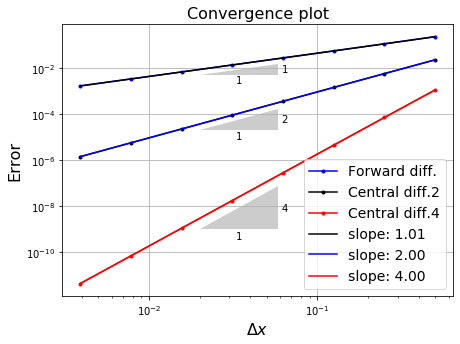

In [121]:
def forward_diff(f, x, dx):
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx


def central_diff2(f, x, dx):
    fxph = f(x + dx)
    fxmh = f(x - dx)
    return (fxph - fxmh) / (2 * dx)

def central_diff4(f, x, dx):
    fxph = f(x + dx)
    fxp2h = f(x + 2*dx)
    fxmh = f(x - dx)
    fxm2h = f(x - 2*dx)
    return (-fxp2h + 8*fxph - 8*fxmh + fxm2h) / (12 * dx)

def fun(x):
    return np.sin(x)


# for this example we know trivially what the exact solution should be
x = 1
exact = np.cos(x)


print('Exact derivative = ', exact)
# headers for the following errors outputs
print('%20s%40s%60s' % ('Forward difference', 'Central difference', '4th order diff'))

# we're going to store all the values for plotting, initialise variable for these
fd_errors = []
cd2_errors = []
cd4_errors = []

dx_all = []
dx = 0.5  # an initial mesh spacing
for i in range(8):
    fd = forward_diff(fun, x, dx)
    cd2 = central_diff2(fun, x, dx)
    cd4 = central_diff4(fun, x, dx)    
    #print('%10g (error=%10.2g)         %10g (error=%10.2g)      %10g (error=%10.2g)' %
    #      (fd, abs(fd - exact), cd2, abs(cd2 - exact), cd4, abs(cd4 - exact)))
    # store the dt values and the errors
    dx_all.append(dx)
    fd_errors.append(abs(fd - exact))
    cd2_errors.append(abs(cd2 - exact))
    cd4_errors.append(abs(cd4 - exact))
    dx = dx / 2  # halve h for the next iteration

    
for i in range(len(dx_all)-1):
    print(fd_errors[i]/fd_errors[i+1], cd2_errors[i]/cd2_errors[i+1], cd4_errors[i]/cd4_errors[i+1] )
    
# as we expect a polynomial relationship between dx and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
# slope 1 for forward diff and slope 2 for central diff

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(dx_all, fd_errors, 'b.-', label='Forward diff.')
ax1.loglog(dx_all, cd2_errors, 'k.-', label='Central diff.2')
ax1.loglog(dx_all, cd4_errors, 'r.-', label='Central diff.4')
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)


## not necessary:
from mpltools import annotation
# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 0

line_fit_fd = np.polyfit(np.log(dx_all[start_fit:]), np.log(fd_errors[start_fit:]), 1)
line_fit_cd2 = np.polyfit(np.log(dx_all[start_fit:]), np.log(cd2_errors[start_fit:]), 1)
line_fit_cd4 = np.polyfit(np.log(dx_all[start_fit:]), np.log(cd4_errors[start_fit:]), 1)

ax1.loglog(dx_all, np.exp(line_fit_fd[1]) * dx_all**(line_fit_fd[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fd[0]))
ax1.loglog(dx_all, np.exp(line_fit_cd2[1]) * dx_all**(line_fit_cd2[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_cd2[0]))
ax1.loglog(dx_all, np.exp(line_fit_cd4[1]) * dx_all**(line_fit_cd4[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_cd4[0]))


annotation.slope_marker((2e-2, 5e-3), (1, 1), ax=ax1, size_frac=0.2, pad_frac=0.05)
annotation.slope_marker((2e-2, 2e-5), (2, 1), ax=ax1, size_frac=0.2, pad_frac=0.05)
annotation.slope_marker((2e-2, 1e-9), (4, 1), ax=ax1, size_frac=0.2, pad_frac=0.05)

ax1.legend(loc='best', fontsize=14)

<br>

**1.3 [4 marks]**

For our case of $f(x) = \sin(x)$ demonstrate why we expect the approximation to the derivative to be completely inaccurate if the value of $\Delta x$ is chosen too large.

For this specific function, can you think of a particular  $x$ location where we expect the central differences approximations to be zero (to round off error), but the forward difference to be, relatively speaking, much larger?

Exact derivative =  6.123233995736766e-17
  Forward difference                      Central difference                                              4th order diff


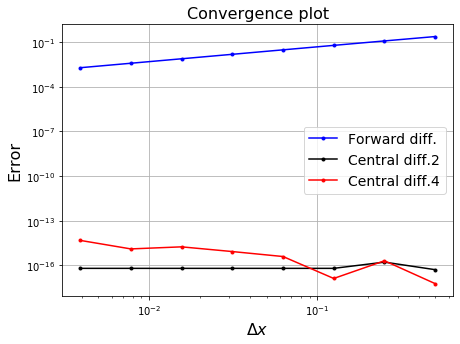

In [9]:
def forward_diff(f, x, dx):
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx


def central_diff2(f, x, dx):
    fxph = f(x + dx)
    fxnh = f(x - dx)
    return (fxph - fxnh) / (2 * dx)

def central_diff4(f, x, dx):
    fxph = f(x + dx)
    fxp2h = f(x + 2*dx)
    fxnh = f(x - dx)
    fxm2h = f(x - 2*dx)
    return (-fxp2h + 8*fxph - 8*fxnh + fxm2h) / (12 * dx)

def fun(x):
    return np.sin(x)


# for this example we know trivially what the exact solution should be
x = np.pi/2
exact = np.cos(x)


print('Exact derivative = ', exact)
# headers for the following errors outputs
print('%20s%40s%60s' % ('Forward difference', 'Central difference', '4th order diff'))

# we're going to store all the values for plotting, initialise variable for these
fd_errors = []
cd2_errors = []
cd4_errors = []

dx_all = []
dx = 0.5  # an initial mesh spacing
for i in range(8):
    fd = forward_diff(fun, x, dx)
    cd2 = central_diff2(fun, x, dx)
    cd4 = central_diff4(fun, x, dx)    
    # store the dt values and the errors
    dx_all.append(dx)
    fd_errors.append(abs(fd - exact))
    cd2_errors.append(abs(cd2 - exact))
    cd4_errors.append(abs(cd4 - exact))
    dx = dx / 2  # halve h for the next iteration

# as we expect a polynomial relationship between dx and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
# slope 1 for forward diff and slope 2 for central diff

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(dx_all, fd_errors, 'b.-', label='Forward diff.')
ax1.loglog(dx_all, cd2_errors, 'k.-', label='Central diff.2')
ax1.loglog(dx_all, cd4_errors, 'r.-', label='Central diff.4')
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

### Question 3 - integration/quadrature [20 marks]

<br>

Consider the following function

\begin{equation}
f(x) = x \mathrm{sin}(\pi x)-\mathrm{e}^{-x} + 10
\end{equation}

where our aim is to accurately compute the integral 

$$I = \int_{-2}^2 f(x)\, dx $$


**3.1 [10 marks]**

For functions such as this where it is not immediately obvious what the exact value for $I$ is, we can still use them for the purposes of verifying quadrature code implementations. 

We achieve this by computing a very accurate estimate for the true integral using a (potentially very) high number of quadrature sub-intervals with a quadrature code we trust. We then use this accurate estimate as "truth" and compute errors with respect to this.

Select a quadrature method and evaluate a very accurate estimate for the value of $I$. Justify why your estimate is accurate and can be trusted.

<br>

**3.2  [10 marks]**

Perform a convergence analysis using the above function, integration interval and your very accurate estimate for $I$ from the first part of this question, i.e. plot the errors as a function of the number of sub-intervals, for the quadrature methods

* Midpoint rule
* Trapezoid rule
* Simpson's rule
* Weddle's rule

## Solution

In [120]:
def f(x):
    return x*np.sin(np.pi*x) - np.exp(-x) + 10.

xl = -2
xr = 2

for interval_sizes in [2**i for i in range(17)]:
    xx = np.linspace(xl, xr, interval_sizes+1)
    print(interval_sizes, integrate.simps(f(xx), xx) )
    
true_int = integrate.simps(f(xx), xx)

1 24.951217235665474
2 32.31707241188849
4 32.71032117977026
8 31.410500239162456
16 31.46998055718536
32 31.472858460441792
64 31.47302846276194
128 31.47303894328027
256 31.47303959608782
512 31.473039636853663
1024 31.473039639400987
2048 31.473039639560184
4096 31.473039639570136
8192 31.473039639570757
16384 31.473039639570796
32768 31.4730396395708
65536 31.4730396395708


In [47]:
def midpoint_rule(a, b, function, number_intervals=10):
    """ Our implementation of the midpoint quadrature rule.
    
    a and b are the end points for our interval of interest.
    
    'function' is the function of x \in [a,b] which we can evaluate as needed.
    
    number_intervals is the number of subintervals/bins we split [a,b] into.
    
    Returns the integral of function(x) over [a,b].
    """
    interval_size = (b - a)/number_intervals

    # Some examples of some asserts which might be useful here - 
    # you should get into the habit of using these sorts of checks as much as is possible/sensible.
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M


def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule.
    
    Note that as discussed in the lecture this version of the implementation 
    performs redundant function evaluations - see the composite implementation 
    in the homework for a more efficient version.
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
                (function(this_bin_start)+function(this_bin_start+interval_size))/2.0

    # Return our running total result
    return I_T


def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

def weddles_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Weddle's quadrature rule using
    appropriate calls to the composite_simpson function
    """
    S = simpsons_composite_rule(a, b, function, number_intervals)
    S2 = simpsons_composite_rule(a, b, function, number_intervals*2)

    return S2 + (S2 - S)/15.

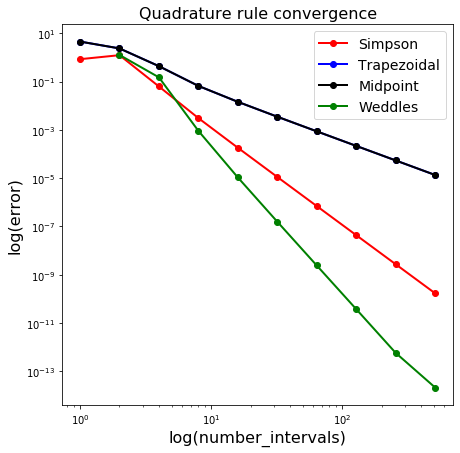

In [51]:
interval_sizes_M = [2**i for i in range(10)]
interval_sizes_T = [2**i for i in range(10)]
interval_sizes_S = [2**i for i in range(10)]
interval_sizes_W = [2**i for i in range(10)]
# due to need for even number of intervals lose the first
interval_sizes_W = interval_sizes_W[1:]

errors_M = np.zeros_like(interval_sizes_M, dtype='float64')
errors_T = np.zeros_like(interval_sizes_T, dtype='float64')
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
errors_W = np.zeros_like(interval_sizes_W, dtype='float64')

areas_M = np.zeros_like(interval_sizes_M, dtype='float64')
areas_T = np.zeros_like(interval_sizes_T, dtype='float64')
areas_S = np.zeros_like(interval_sizes_S, dtype='float64')
areas_W = np.zeros_like(interval_sizes_W, dtype='float64')

for (i, number_intervals) in enumerate(interval_sizes_M):
    areas_M[i] = midpoint_rule(xl, xr, f, number_intervals)
    errors_M[i] = abs(areas_M[i] - true_int)

for (i, number_intervals) in enumerate(interval_sizes_T):
    areas_T[i] = midpoint_rule(xl, xr, f, number_intervals)
    errors_T[i] = abs(areas_T[i] - true_int)    
    
for (i, number_intervals) in enumerate(interval_sizes_S):
    areas_S[i] = simpsons_rule(xl, xr, f, number_intervals)
    errors_S[i] = abs(areas_S[i] - true_int)

for (i, number_intervals) in enumerate(interval_sizes_W):
    areas_W[i] = weddles_rule(xl, xr, f, number_intervals)
    errors_W[i] = abs(areas_W[i] - true_int)   
    

# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.loglog(interval_sizes_W, errors_W, 'go-', lw=2, label='Weddles')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)


### Question 4 - root-finding [20 marks]

<br>

Consider the function

$$f(x) = \dfrac{1}{(x − 0.2)^2 + 0.1} - \dfrac{1}{(x − 0.6)^2 + 0.05}$$

<br>

**4.1 [7 marks]**

Plot this function over the interval $[-2,2]$.

How many roots does $f$ appear to have within this interval?

Apply root bracketing to find the location of the root to within a sub-interval size of 0.1.

Use the Scipy implementation of Newton's method (without providing derivative information) to estimate the root.

<br>

**4.2 [7 marks]**

Apply your own bisection, quasi-Newton and secant methods to this problem to estimate the root.

<br>

**4.3 [6 marks]**

Given a function of the general form

$$g(x) = \dfrac{1}{(x − a)^2 + b}$$

for constants $a$ and $b$, we can use the chain rule to show that its derivative is given by

$$\dfrac{dg}{dx}(x) = \dfrac{-2(x-a)}{((x − a)^2 + b)^2}$$

Using the information, write a function to exactly calculate $\dfrac{df}{dx}$ for our $f$ function and find the root using Newton's method making use of this exact derivative information.

<br>

Explain how Newton's method can fail to converge and demonstrate this using our $f$ function.

## Solution

0.33749999999998953


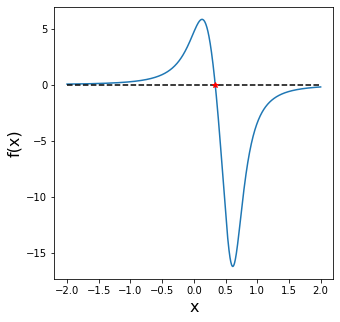

In [81]:
def f(x):
    return 1./((x-0.2)**2+0.1) - 1./((x-0.6)**2+0.05)


# plot
xx = np.linspace(-2,2,1000)
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.plot(xx,f(xx))
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('f(x)', fontsize=16)
ax1.plot(xx,np.zeros_like(xx),'k--')

x0 = 0.3
xr = sop.newton(f, x0)
print(xr)
ax1.plot(xr,0,'r*')

In [74]:
def root_bracketing(f, a, b, dx):
    """ Function to perform root bracketing on the function f(.)
    between a and b, with fixed interval size dx.
    Returns the bracket of size dx that contains the root.
    """ 
    # The sign function returns:  -1 if x < 0;  0 if x==0;  1 if x > 0.
    sign = np.sign(f(a))
    while sign == np.sign(f(a)):
        a += dx
        if a >= b:
            raise RuntimeError('no root within [a,b]')
    return (a-dx, a)


a = -2.
b = 2.
dx = 0.1
# print out the output from our root_bracketing function
print('Bracket = ', root_bracketing(f, a, b, dx))


Bracket =  (0.3000000000000007, 0.4000000000000007)


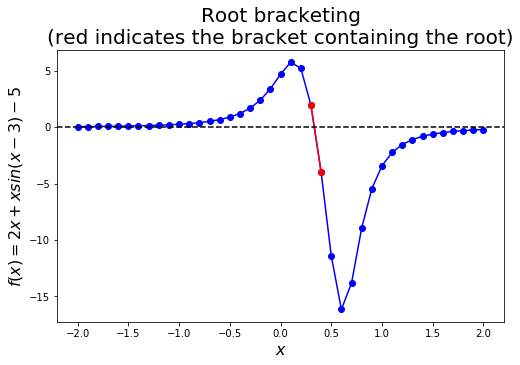

In [75]:
def plot_root_bracketing(f, a, b, dx, ax, xbounds=(-0.1, 1.4), ybounds=(-5, 6), flabel=''):
    x = np.linspace(a, b, int((b-a)/dx)+1)
    y = f(x)
    # plot the sub-intervals in blue
    ax.plot(x, y, 'bo-')
    for i in range(1, len(x)):
        if np.sign(y[i]) != np.sign(y[i-1]):
            # plot the sub-interval where the sign changes in red
            ax.plot([x[i], x[i-1]], [y[i], y[i-1]], 'ro-')
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], 'k--')
    ax.set_xlim(xlim)
    ax.set_title('Root bracketing\n' + '(red indicates the bracket containing the root)', fontsize=20)

 # let's also use our plotting function from above.
fig, ax1 = plt.subplots(figsize=(8,5))
plot_root_bracketing(f, a, b, 0.1, ax1, flabel=r'$f(x) = 2x + xsin(x-3) - 5$')   

In [65]:
def bisection(fct, a, b, atol=1.0E-6, nmax=100):
    n = 0
    while n <= nmax:
        c = (a+b)/2.
        if fct(c) == 0. or (b-a)/2. < atol:
            return c
        n += 1
        if np.sign(fct(c)) == np.sign(fct(a)):
            a = c
        else:
            b = c
    raise RuntimeError('no root found within [a,b]')

a, b = -1., 1.
print(bisection(f, a, b))

0.33750057220458984


In [71]:
def quasi_newton(f, x0, dx=1.0E-7, atol=1.0E-6):
    """ Function to implement quasi-newton
    
    f is the function we are trying to find a root of
    """
    x = [x0]
    while True:
        dfdx = (f(x[-1] + dx) - f(x[-1]))/(dx)
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

x0 = 0.2
print(quasi_newton(f, x0))

0.33750000000001756


In [73]:
def secant(f, x0, x1, atol=1.0E-6):
    """ Function to implement the secant method
    
    x0 and x1 are the two required guesses
    
    f is the function we are trying to find a root of
    """
    x = [x0, x1]
    while True:
        dfdx = (f(x[-1])-f(x[-2])) / (x[-1]-x[-2])
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]
        
        
x0 = 0.5
x1 = x0 + 0.1
print(secant(f, x0, x1))

0.337500000207198


In [96]:
def f(x):
    return 1./((x-0.2)**2+0.1) - 1./((x-0.6)**2+0.05)

def dfdx(x):
    return (-2*(x-0.2) / ((x-0.2)**2+0.1)**2) + (2*(x-0.6) / ((x-0.6)**2+0.05)**2)

x0 = 0.35
print(sop.newton(f, x0))
print(sop.newton(f, x0, dfdx))

0.3375000000000835
0.33749999999999997


In [99]:
def f(x):
    return 1./((x-0.2)**2+0.1) - 1./((x-0.6)**2+0.05)

def dfdx(x):
    return (-2*(x-0.2) / ((x-0.2)**2+0.1)**2) + (2*(x-0.6) / ((x-0.6)**2+0.05)**2)

def newton(f, x0, dfdx, atol=1.0e-6):
    """ Function to implement the Newton-Raphson method
    
    f is the function we are trying to find a root of
    
    and dfdx is another function which return the derivative of f
    """
    x = [x0]
    fevals = 0
    while True:
        x.append(x[-1] - f(x[-1])/dfdx(x[-1]))  # two function evaluations (f and dfdx)
        fevals += 2
        if abs(x[-1]-x[-2]) < atol:
            print('Newton (analytical derivative) used', fevals, 'function evaluations')
            return x[-1]
        
x0 = 0.35
print(newton(f, x0, dfdx))

Newton (analytical derivative) used 6 function evaluations
0.33750000000007924


RuntimeError: Failed to converge after 50 iterations, value is -1868767.5724413288

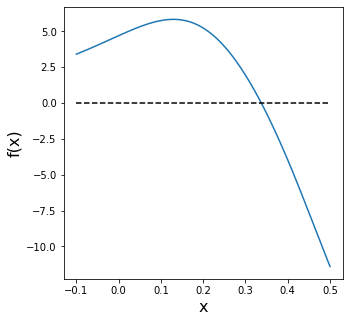

In [102]:
# plot
xx = np.linspace(-0.1,0.5,1000)
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.plot(xx,f(xx))
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('f(x)', fontsize=16)
ax1.plot(xx,np.zeros_like(xx),'k--')

# looking at plot we see a flat location, i.e. small gradient (which we divide by)
# at around x=0.1

x0 = 0.1
print(sop.newton(f, x0, dfdx))

### Question 5 - numerical linear algebra [20 marks]

<br>

Consider the following set of linear equations

\begin{align*}
  x + 2y + -2z &= 7 \\
  -x +  8z &= 7 \\
  2x + 6y + 3z &= 30
\end{align*}

<br>

**5.1 [8 marks]**

Write this system in matrix form, form the corresponding augmented system and perform row operations until you transform the system to upper-triangular form, find the solution using back substitution (**do this all with pen and paper**).

Check your answer using any method available to you to solve this problem in SciPy of NumPy.

<br>

**5.2 [4 marks]**

By considering the final upper-triangular form of the augmented system, give examples of updated $A$ matrix and/or $\pmb{b}$ vector that result in two separate scenarios: (i) our system now has infinitely many exact solutions and (ii) our system has no solutions.

<br>

**5.3 [8 marks]**

If instead of placing a RHS vector $\pmb{b}$ vector on the right of the augmented system, we place the identity matrix, i.e. we form $[A|I]$, then performing row operations to transform $A$ into the identity matrix results in the original $I$ matrix transforming into the inverse of $A$, e.g. we are left with the augmented system $[I|A^{-1}]$.

Write some code that given a matrix $A$ uses this approach to return a matrix $A^{-1}$. Test your code on the original $A$ matrix. 

[NB. Your implementation doesn't need to actually form the augmented matrix, you just need to make sure that you consistently apply row operations to the matrices that start out as $A$ and $I$].



### Answer 5

### Gaussian elimination steps


$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & -2 & 7 \\
    -1 & 0 & 8 & 7 \\
    2 & 6 & 3 & 30\\    
  \end{array}
\right]
$$

Eliminate first column below pivot:

$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & -2 & 7 \\
    0 & 2 & 6 & 14 \\
    0 & 2 & 7 & 16\\    
  \end{array}
\right]
$$

and second 

$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & -2 & 7 \\
    0 & 2 & 6 & 14 \\
    0 & 0 & 1 & 2\\    
  \end{array}
\right]
$$

So $z=2$, $y = 7-3z=7-6=1$,  $x = 7 - 2y + 2z = 7 -2 +4 = 9$

In [103]:
def back_substitution(A, b):
    """ Function to perform back subsitution on the system Ax=b.
    
    Returns the solution x.
    
    Assumes that A is on upper triangular form.
    """
    n = np.size(b)
    # Check A is square and its number of rows and columns same as size of the vector b
    rows, cols = np.shape(A)
    assert(rows == cols)
    assert(rows == n)
    # We can/should check that A is upper triangular using np.triu which is the 
    # upper triangular part of a matrix - if A is already upper triangular, then
    # it should of course match the upper-triangular component of A!!
    assert(np.allclose(A, np.triu(A)))
    
    x = np.zeros(n)
    # start at the end (row n-1) and work backwards
    for k in range(n-1, -1, -1):
        # note that we could do this update in a single vectorised line 
        # using np.dot or @ - this could also speed things up
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]

    return x


def backward_substitution(A, b):
    n = np.size(b)    
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]    
    return x

In [105]:
# This version of the solution does not use partial pivoting 
# and hence doesn't need to deal with a P matrix

def LU_decomposition(A):
    # construct upper triangular matrix contains Gaussian elimination result
    # we won't change A in-place but create a local copy
    # if we don't do this then A will be over-written by the U we
    # compute and return
    A = A.copy()
    m, n = A.shape
    assert(m == n)
    # For simplicity we set up a matrix to store L, but note the comment above
    # that if we had memory concerns we would reuse zeroed entries in A.
    # We don't initialise this to the identity now, as this won't be correct
    # when we use partial pivoting a little later.
    L = np.zeros((n,n))
    # Loop over each pivot row - don't need to consider the final row as a pivot
    for k in range(n-1):
        # Loop over each equation below the pivot row - now we do need to consider the last row
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed.
            s = (A[i, k] / A[k, k])
            for j in range(k, n):
                A[i, j] = A[i, j] - s*A[k, j]
            # store the scaling factors which make up the lower tri matrix
            L[i, k] = s
    # remember to add in the ones on the main diagonal to L
    L += np.eye(m)
    # A now is the upper triangular matrix U 
    return L, A

# This function assumes that A is already an upper triangular matrix.
def backward_substitution(A, b):
    n = np.size(b)    
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]    
    return x

# This function assumes that A is already a lower triangular matrix.
def forward_substitution(A, b):
    n = np.size(b)    
    x = np.zeros(n)
    for k in range(n):
        s = 0.
        for j in range(k):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]
    
    return x

def LU_solve(A, b):
    """ An LU solve function that makes use of our
    non partial pivoting versions of LU_decomposition
    followed by forward_substitution and
    backward_substitution
    """ 
    L, U = LU_decomposition(A)
    print('L=',L)
    print('U=',U)
    y = forward_substitution(L, b)
    x = backward_substitution(U, y)
    return x


A = np.array([[1., 2., -2.], 
              [-1., 0., 8.],
              [2., 6., 3.]])
b = np.array([7., 7., 30.])

x = LU_solve(A, b)
print('x=',x)
# Always check that our implementation produces the right result
print(np.allclose(np.linalg.solve(A, b), LU_solve(A, b)))

L= [[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 2.  1.  1.]]
U= [[ 1.  2. -2.]
 [ 0.  2.  6.]
 [ 0.  0.  1.]]
x= [9. 1. 2.]
L= [[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 2.  1.  1.]]
U= [[ 1.  2. -2.]
 [ 0.  2.  6.]
 [ 0.  0.  1.]]
True


Note that U here is the same as we derived by hand

If our final augmented system in lower triangular form instead read as 
$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & -2 & 7 \\
    0 & 2 & 6 & 14 \\
    0 & 0 & 0 & 2\\    
  \end{array}
\right]
$$

then the system has no solutions. This final form results from simply changing the original system to

$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & -2 & 7 \\
    -1 & 0 & 8 & 7 \\
    2 & 6 & 2 & 30\\    
  \end{array}
\right]
$$


We get infinite solutions if we instead have a final row in our augmented system that reads $0=0$, i.e.

$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & -2 & -20 \\
    0 & 2 & 6 & 14 \\
    0 & 0 & 0 & 0\\    
  \end{array}
\right]
$$

This final form results from simply changing the original system to

$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & -2 & 7 \\
    -1 & 0 & 8 & 7 \\
    2 & 6 & 2 & 28\\    
  \end{array}
\right]
$$


In [109]:
A = np.array([[1., 2., -2.], 
              [-1., 0., 8.],
              [2., 6., 2.]])
b = np.array([7., 7., 30.])

print(sl.det(A))
print(np.linalg.solve(A, b))
print(LU_solve(A, b))


0.0
[ 2.40191980e+16 -9.00719925e+15  3.00239975e+15]
L= [[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 2.  1.  1.]]
U= [[ 1.  2. -2.]
 [ 0.  2.  6.]
 [ 0.  0.  0.]]
[ inf -inf  inf]


C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


In [110]:
A = np.array([[1., 2., -2.], 
              [-1., 0., 8.],
              [2., 6., 2.]])
b = np.array([7., 7., 28.])

print(sl.det(A))
print(np.linalg.solve(A, b))
print(LU_solve(A, b))

0.0
[7.   1.75 1.75]
L= [[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 2.  1.  1.]]
U= [[ 1.  2. -2.]
 [ 0.  2.  6.]
 [ 0.  0.  0.]]
[nan nan nan]


C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


In [114]:
from pprint import pprint

# This updated version of the upper_triangular function now
# assumes that a matrix, B, is in the old vector location (what was b)
# in the augmented system, and applies the same operations to
# B as to A - only a minor difference

def upper_triangle2(A, B):
    m, n = np.shape(A)
    assert(n == m)  # this is designed to work for a square matrix

    # Loop over each pivot row.
    for k in range(n-1):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed as you are
            # over-writing A
            s = (A[i, k]/A[k, k])
            for j in range(n):
                A[i, j] = A[i, j] - s*A[k, j]
                # replace the old b update with the same update as A
                B[i, j] = B[i, j] - s*B[k, j]


# and this is a version which transforms the matrix into lower
# triangular form - the point here is that if you give it a
# matrix that is already in upper triangular form, then the
# result will be a diagonal matrix
def lower_triangle2(A, B):
    m, n = np.shape(A)
    assert(n == m)  # this is designed to work for a square matrix
    # now it's basically just the upper triangular algorithm 
    # applied backwards
    for k in range(n-1, -1, -1):
        for i in range(k-1, -1, -1):
            s = (A[i, k]/A[k, k])
            for j in range(n):
                A[i, j] = A[i, j] - s*A[k, j]
                B[i, j] = B[i, j] - s*B[k, j]


# Let's redefine A as our matrix above
A = np.array([[1., 2., -2.], 
              [-1., 0., 8.],
              [2., 6., 3.]])

# and B is the identity of the corresponding size
B = np.eye(np.shape(A)[0])

# transform A into upper triangular form 
# (and perform the same operations on B)
upper_triangle2(A, B)
print('Upper triangular transformed A = ')
pprint(A)

# now make this updated A lower triangular as well 
# (the result should be diagonal)
lower_triangle2(A, B)
print('\nand following application of our lower triangular function = ')
pprint(A)

# The final step to achieve the identity is just to divide each row through by the value 
# of the diagonal to end up with 1's on the main diagonal and 0 everywhere else.
for i in range(np.shape(A)[0]):
    B[i, :] = B[i, :]/A[i, i]
    A[i, :] = A[i, :]/A[i, i]

# the final A should be the identity
print('\nOur final transformed A = ')
pprint(A)

# the final B should therefore be the inverse of the original B
print('\nand the correspondingly transformed B = ')
pprint(B)

# let's compute the inverse using built-in functions and check
# we get the same answer (we need to reinitialise A)
A = np.array([[1., 2., -2.], 
              [-1., 0., 8.],
              [2., 6., 3.]])

b = np.array([7., 7., 30.])

print('\nSciPy computes the inverse as:')
pprint(sl.inv(A))

# B should now store the inverse of the original A - let's check
print('\nSuccess: ', np.allclose(B, sl.inv(A)))

Upper triangular transformed A = 
array([[ 1.,  2., -2.],
       [ 0.,  2.,  6.],
       [ 0.,  0.,  1.]])

and following application of our lower triangular function = 
array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 1.]])

Our final transformed A = 
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

and the correspondingly transformed B = 
array([[-24. ,  -9. ,   8. ],
       [  9.5,   3.5,  -3. ],
       [ -3. ,  -1. ,   1. ]])

SciPy computes the inverse as:
array([[-24. ,  -9. ,   8. ],
       [  9.5,   3.5,  -3. ],
       [ -3. ,  -1. ,   1. ]])

Success:  True


In [118]:
def our_inverse_code(A):
    B = np.eye(np.shape(A)[0])
    upper_triangle2(A, B)
    lower_triangle2(A, B)
    for i in range(np.shape(A)[0]):
        B[i, :] = B[i, :]/A[i, i]
        A[i, :] = A[i, :]/A[i, i]
    return B

A = np.array([[1., 2., -2.], 
              [-1., 0., 8.],
              [2., 6., 3.]])

b = np.array([7., 7., 30.])

print('\nSciPy computes the inverse as:')
pprint(our_inverse_code(A))

# B should now store the inverse of the original A - let's check
print('\nSuccess: ', np.allclose(our_inverse_code(A), sl.inv(A)))

print(our_inverse_code(A)@b)


SciPy computes the inverse as:
array([[-24. ,  -9. ,   8. ],
       [  9.5,   3.5,  -3. ],
       [ -3. ,  -1. ,   1. ]])

Success:  True
[ 7.  7. 30.]
